# 근로소득에 따른 의료 접근성 - 한국과 핀란드를 중심으로

## 데이터 정보
ISSP 2011 : Health
한국 : 한국종합사회조사(KGSS) 누적데이터    
핀란드 : Finnish Social Science Data Archive

누적데이터는 기존 공개된 연도별 데이터 중 오류를 수정한 내용을 포함하고 있습니다. 또한, 모든 연도에 적용할 가중치 변수가 포함되어 있습니다. 누적데이터 이용을 추천합니다.

## 패키지 설치

In [17]:
install.packages("foreign")
library(foreign)

Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'를 열 수 없습니다"Warning message:
"package 'foreign' is in use and will not be installed"

## 파일 불러오기

In [18]:
kordata <- read.spss("C:/Users/eunee/khu_project_2019/data/kor.sav", reencode = 'utf-8', use.value.labels = FALSE, to.data.frame = TRUE)
findata <- read.spss("C:/Users/eunee/khu_project_2019/data/fin.por", use.value.labels = FALSE, to.data.frame = TRUE)

Warning message in read.spss("C:/Users/eunee/khu_project_2019/data/kor.sav", reencode = "utf-8", :
"C:/Users/eunee/khu_project_2019/data/kor.sav: Very long string record(s) found (record type 7, subtype 14), each will be imported in consecutive separate variables"Warning message in read.spss("C:/Users/eunee/khu_project_2019/data/kor.sav", reencode = "utf-8", :
"C:/Users/eunee/khu_project_2019/data/kor.sav: Long string value labels record found (record type 7, subtype 21), but ignored"re-encoding from utf-8


한글 인코딩을 위해 ```reencode = 'utf-8'``` 코드를 추가

## 한국 데이터 클리닝

KGSS 누적 데이터를 다운받아 그중 2011년 자료를 ```subset```해서 사용한다.

In [19]:
kor_2011 <- subset(kordata, YEAR == 2011)

필요한 변수를 ```subset```한다.

In [20]:
kor <- subset(kor_2011, select = c("SEX", "AGE", "MARITAL", "RINCOME", "TRTWHY1", "TRTWHY2", "TRTWHY3", "TRTWHY4"))

In [21]:
names(kor)[4] <- "INCOME"

### ```SEX```

```SEX```를 ```0```(남성), ```1```(여성)으로 바꾼다.

In [22]:
kor$SEX <- ifelse(kor$SEX == 1, "male", kor$SEX)
kor$SEX <- ifelse(kor$SEX == 2, "female", kor$SEX)

### ```MARITAL```

동거에 ```cohabit```, 비동거에 ```non-cohabit```, 미혼에 ```single```의 새로운 값을 부여한다. 
- 동거 : 기혼, 동거    
- 비동거 : 사별, 이혼 별거    
- 미혼

In [23]:
kor$MARITAL <- ifelse(kor$MARITAL == 1, "cohabit", kor$MARITAL)
kor$MARITAL <- ifelse(kor$MARITAL == 2, "non-cohabit", kor$MARITAL)
kor$MARITAL <- ifelse(kor$MARITAL == 3, "non-cohabit", kor$MARITAL)
kor$MARITAL <- ifelse(kor$MARITAL == 4, "non-cohabit", kor$MARITAL)
kor$MARITAL <- ifelse(kor$MARITAL == 5, "single", kor$MARITAL)
kor$MARITAL <- ifelse(kor$MARITAL == 6, "cohabit", kor$MARITAL)

### ```INCOME```

'비해당'을 ```ifelse```문을 이용해 ```NA```처리한다.

In [24]:
kor$INCOME <- ifelse(kor$INCOME==-8, NA, kor$INCOME)
kor$INCOME <- ifelse(kor$INCOME==-1, NA, kor$INCOME)

### ```TRTWHY```

특정 사건을 '겪는' 경우를 ```1```, 그렇지 않은 경우 ```0```으로 처리한다.

In [25]:
kor$TRTWHY1 <- ifelse(kor$TRTWHY1 == 1, "Y", kor$TRTWHY1)
kor$TRTWHY2 <- ifelse(kor$TRTWHY2 == 1, "Y", kor$TRTWHY2)
kor$TRTWHY3 <- ifelse(kor$TRTWHY3 == 1, "Y", kor$TRTWHY3)
kor$TRTWHY4 <- ifelse(kor$TRTWHY4 == 1, "Y", kor$TRTWHY4)

In [26]:
kor$TRTWHY1 <- ifelse(kor$TRTWHY1 == 2, "N", kor$TRTWHY1)
kor$TRTWHY2 <- ifelse(kor$TRTWHY2 == 2, "N", kor$TRTWHY2)
kor$TRTWHY3 <- ifelse(kor$TRTWHY3 == 2, "N", kor$TRTWHY3)
kor$TRTWHY4 <- ifelse(kor$TRTWHY4 == 2, "N", kor$TRTWHY4)

응답에서 '모르겠다/무응답', '비해당'을 ```ifelse```문을 이용해 ```NA```처리한다.

In [27]:
kor$TRTWHY1 <- ifelse(kor$TRTWHY1==-1, NA, kor$TRTWHY1)
kor$TRTWHY2 <- ifelse(kor$TRTWHY2==-1, NA, kor$TRTWHY2)
kor$TRTWHY3 <- ifelse(kor$TRTWHY3==-1, NA, kor$TRTWHY3)
kor$TRTWHY4 <- ifelse(kor$TRTWHY4==-1, NA, kor$TRTWHY4)

### ```NA``` 제거

```kor```에 있는 ```NA```를 제거한다.

In [28]:
kor <- kor[complete.cases(kor), ]

### 변수 범주화

In [29]:
kor$SEX <- as.factor(kor$SEX)
kor$MARITAL <- as.factor(kor$MARITAL)
kor$TRTWHY1 <- as.factor(kor$TRTWHY1)
kor$TRTWHY2 <- as.factor(kor$TRTWHY2)
kor$TRTWHY3 <- as.factor(kor$TRTWHY3)
kor$TRTWHY4 <- as.factor(kor$TRTWHY4)

## ```kor```

- ```SEX``` : 성별
    - ```male``` : 남자
    - ```female``` : 여자

    
- ```AGE``` : 연령(만 나이)


- ```MARITAL``` : 동거
    - ```cohabit``` : 동거
    - ```non-cohabit``` : 비동거
    - ```single``` : 미혼
    
    
- ```INCOME``` : 월 평균 근로소득 (세전)
    - ```0``` : 소득 없음
    - ```1``` : 50만원 미만
    - ```2``` : 50만원 ~ 99만원
    - ```3``` : 100만원 ~ 149만원
    - ```4``` : 150만원 ~ 199만원
    - ```5``` : 200만원 ~ 249만원
    - ```6``` : 250만원 ~ 299만원
    - ```7``` : 300만원 ~ 349만원
    - ```8``` : 350만원 ~ 399만원
    - ```9``` : 400만원 ~ 449만원
    - ```10``` : 450만원 ~ 499만원
    - ```11``` : 500만원 이상

    
    
- 치료 못 받았던 경험  
    ```TRTWHY1``` : 비용을 지불할 능력이 없어서
    - ```N``` : 없었다
    - ```Y``` : 있었다
    
 ```TRTWHY2``` : 직장을 빠지고 갈 시간이 없거나 다른 일로 바빠서  
    - ```N``` : 없었다
    - ```Y``` : 있었다

 ```TRTWHY3``` : 거주하는 동네나 인근에서는 필요한 치료를 받을 수 없어서   
    - ```N``` : 없었다
    - ```Y``` : 있었다
  
 ```TRTWHY4``` : 치료를 기다리는 사람들이 너무 많아서   
    - ```N``` : 없었다
    - ```Y``` : 있었다

In [30]:
summary(kor)

     SEX           AGE               MARITAL        INCOME       TRTWHY1
 female:308   Min.   :19.00   cohabit    :526   Min.   : 0.000   N:663  
 male  :377   1st Qu.:36.00   non-cohabit: 60   1st Qu.: 3.000   Y: 22  
              Median :44.00   single     : 99   Median : 5.000          
              Mean   :45.01                     Mean   : 5.999          
              3rd Qu.:52.00                     3rd Qu.: 7.000          
              Max.   :81.00                     Max.   :21.000          
 TRTWHY2 TRTWHY3 TRTWHY4
 N:478   N:630   N:604  
 Y:207   Y: 55   Y: 81  
                        
                        
                        
                        

## 핀란드 데이터 클리닝

필요한 데이터를 ```subset```해 이름을 바꾼다.

In [31]:
fin <- subset(findata, select = c("K1", "K2", "K13", "K59", "K38A", "K38B", "K38C", "K38D"))

In [32]:
names(fin) <- c("SEX", "AGE", "MARITAL", "INCOME", "TRTWHY1", "TRTWHY2", "TRTWHY3", "TRTWHY4")

### ```SEX```

남성을 0, 여성을 1로 코딩한다.

In [33]:
fin$SEX <- ifelse(fin$SEX == 1, "male", fin$SEX)
fin$SEX <- ifelse(fin$SEX == 2, "female", fin$SEX)

###  ```AGE```

한국의 경우 연령 정보가 나이로 되어 있는 반면, 핀란드의 데이터에서는 태어난 연도로 되어 있다. 이를 모두 연령 단위로 통일해 ```age``` 변수로 만든다.

In [34]:
fin$AGE <- 2011-fin$AGE

### ```MARITAL```

동거에 ```cohabit```, 비동거에 ```non-cohabit```, 미혼에 ```single```의 새로운 값을 부여한다. 
- 동거 : 기혼, 동거    
- 비동거 : 사별, 이혼 별거    
- 미혼

In [35]:
fin$MARITAL <- ifelse(fin$MARITAL == 1, "cohabit", fin$MARITAL)
fin$MARITAL <- ifelse(fin$MARITAL == 2, "non-cohabit", fin$MARITAL)
fin$MARITAL <- ifelse(fin$MARITAL == 3, "single", fin$MARITAL)

### ```INCOME```

히스토그램을 이용해 임금의 분포를 살펴보자.

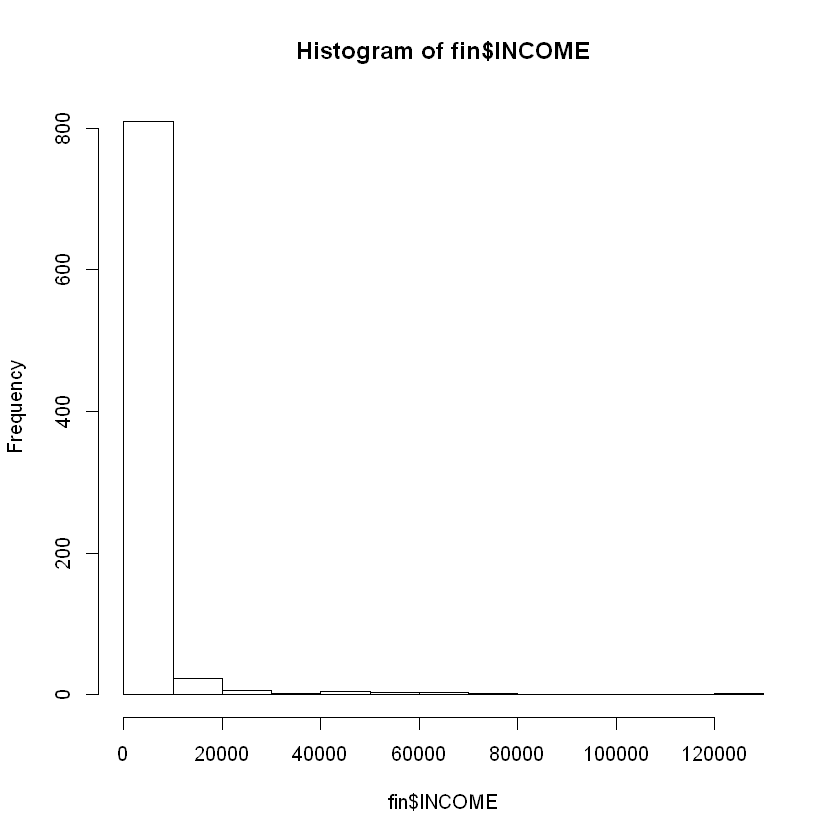

In [36]:
hist(fin$INCOME)

임금 변수의 왜도가 심하므로 올바른 분석을 하기 어렵다. 따라서 로그를 취해 왜도를 줄인다.

In [37]:
fin$INCOME <- log(fin$INCOME)

###  ```TRTWHY```

```TRTWHY```에서 특정 사건을 '겪는' 경우를 1로 코딩한다.

In [38]:
fin$TRTWHY1 <- ifelse(fin$TRTWHY1 == 1, "Y", fin$TRTWHY1)
fin$TRTWHY2 <- ifelse(fin$TRTWHY2 == 1, "Y", fin$TRTWHY2)
fin$TRTWHY3 <- ifelse(fin$TRTWHY3 == 1, "Y", fin$TRTWHY3)
fin$TRTWHY4 <- ifelse(fin$TRTWHY4 == 1, "Y", fin$TRTWHY4)

In [39]:
fin$TRTWHY1 <- ifelse(fin$TRTWHY1 == 2, "N", fin$TRTWHY1)
fin$TRTWHY2 <- ifelse(fin$TRTWHY2 == 2, "N", fin$TRTWHY2)
fin$TRTWHY3 <- ifelse(fin$TRTWHY3 == 2, "N", fin$TRTWHY3)
fin$TRTWHY4 <- ifelse(fin$TRTWHY4 == 2, "N", fin$TRTWHY4)

'비해당' 응답은 ```NA```로 처리한다.

In [40]:
fin$TRTWHY1 <- ifelse(fin$TRTWHY1 == 8, NA, fin$TRTWHY1)
fin$TRTWHY2 <- ifelse(fin$TRTWHY2 == 8, NA, fin$TRTWHY2)
fin$TRTWHY3 <- ifelse(fin$TRTWHY3 == 8, NA, fin$TRTWHY3)
fin$TRTWHY4 <- ifelse(fin$TRTWHY4 == 8, NA, fin$TRTWHY4)

```NA```를 제거한다.

In [41]:
fin <- fin[complete.cases(fin), ]

변수들을 범주화한다.

In [42]:
fin$SEX <- factor(fin$SEX)
fin$MARITAL <- factor(fin$MARITAL)
fin$TRTWHY1 <- factor(fin$TRTWHY1)
fin$TRTWHY2 <- factor(fin$TRTWHY2)
fin$TRTWHY3 <- factor(fin$TRTWHY3)
fin$TRTWHY4 <- factor(fin$TRTWHY4)

- ```SEX``` : 성별
    - ```male``` : 남자
    - ```female``` : 여자

    
- ```AGE``` : 출생년도


- ```MARTIAL``` : 동거
    - ```cohabit``` : 동거
    - ```non-cohabit``` : 비동거
    - ```single``` : 해당 없음(미혼)
    
    
- ```INCOME``` : 로그를 취한 월 평균 총 소득 (세전, 근로외 소득 포함)
    
    
- 치료 못 받았던 경험  
    ```TRTWHY1``` : 비용을 지불할 능력이 없어서
    - ```N``` : 없었다
    - ```Y``` : 있었다
    
 ```TRTWHY2``` : 직장을 빠지고 갈 시간이 없거나 다른 일로 바빠서  
    - ```N``` : 없었다
    - ```Y``` : 있었다

 ```TRTWHY3``` : 거주하는 동네나 인근에서는 필요한 치료를 받을 수 없어서   
    - ```N``` : 없었다
    - ```Y``` : 있었다
  
 ```TRTWHY4``` : 치료를 기다리는 사람들이 너무 많아서   
    - ```N``` : 없었다
    - ```Y``` : 있었다

In [43]:
summary(fin)

     SEX           AGE               MARITAL        INCOME       TRTWHY1
 female:280   Min.   :15.00   cohabit    :456   Min.   : 2.303   N:474  
 male  :245   1st Qu.:35.00   non-cohabit: 13   1st Qu.: 8.006   Y: 51  
              Median :48.00   single     : 56   Median : 8.412          
              Mean   :46.73                     Mean   : 8.386          
              3rd Qu.:60.00                     3rd Qu.: 8.700          
              Max.   :75.00                     Max.   :11.736          
 TRTWHY2 TRTWHY3 TRTWHY4
 N:487   N:485   N:447  
 Y: 38   Y: 40   Y: 78  
                        
                        
                        
                        

## 작업 공간 저장

In [44]:
save.image(file = "C:/Users/eunee/khu_project_2019/data_cleaning.RData")